In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_inmo.csv to dataset_inmo.csv


In [4]:
df = pd.read_csv('dataset_inmo.csv', sep=';')
df.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Property Type,Residential Type,area_m2,meses_en_venta,Sale Amount,nro_habitaciones,nro_pisos
0,21,2021,10/05/2021,Portland,323 JONES HOLLOW RD,279000.0,Residential,Single Family,155m2,9,279000,5,2
1,82,2008,10/01/2008,Windham,17 SUNRISE HILL,443200.0,Single Family,Single Family,277m2,1,443200,7,3
2,83,2008,10/01/2008,Windham,33 HIDDEN PINES CIRCLE,454400.0,Single Family,Single Family,284m2,4,454400,7,3
3,84,2008,10/01/2008,Windham,24 PILGRIM LANE,262800.0,Single Family,Single Family,146m2,7,262800,4,2
4,85,2008,10/01/2008,Windham,46 ORCHID RD,341700.0,Single Family,Single Family,201m2,8,341700,6,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666324 entries, 0 to 666323
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     666324 non-null  int64  
 1   List Year         666324 non-null  int64  
 2   Date Recorded     666324 non-null  object 
 3   Town              666324 non-null  object 
 4   Address           666324 non-null  object 
 5   Assessed Value    666324 non-null  float64
 6   Property Type     666324 non-null  object 
 7   Residential Type  666324 non-null  object 
 8   area_m2           666324 non-null  object 
 9   meses_en_venta    666324 non-null  int64  
 10  Sale Amount       666324 non-null  int64  
 11  nro_habitaciones  666324 non-null  int64  
 12  nro_pisos         666324 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 66.1+ MB


In [6]:
df['Sale Amount'] = df['Sale Amount'].astype(float)

In [8]:
print(df.columns)

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Property Type', 'Residential Type', 'area_m2',
       'meses_en_venta', 'Sale Amount', 'nro_habitaciones', 'nro_pisos'],
      dtype='object')


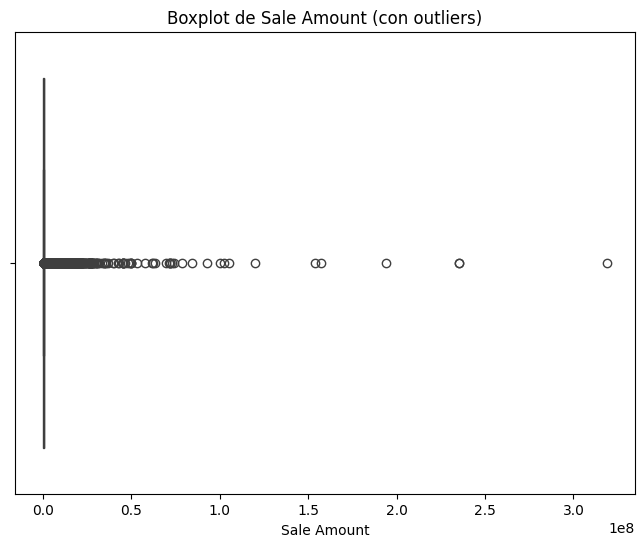

In [10]:
# Graficar el boxplot nuevamente después de eliminar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sale Amount'])
plt.title('Boxplot de Sale Amount (con outliers)')
plt.show()

Eliminamos los valores atipicos de mi data inicial

In [11]:
# Calcular el IQR
Q1 = df['Sale Amount'].quantile(0.25)
Q3 = df['Sale Amount'].quantile(0.75)
IQR = Q3 - Q1

# Determinar los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
df_filtered = df[(df['Sale Amount'] >= lower_limit) & (df['Sale Amount'] <= upper_limit)]

# Verificar el número de registros antes y después de eliminar los outliers
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar outliers: {df_filtered.shape[0]}")


Filas originales: 666324
Filas después de eliminar outliers: 617183


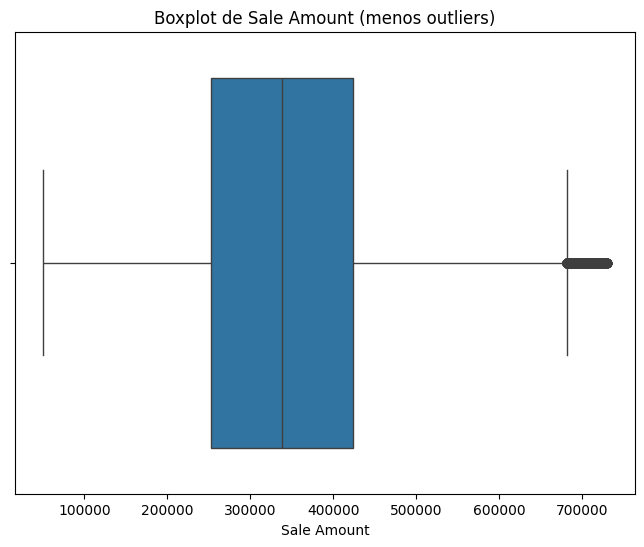

In [13]:
# Graficar el boxplot nuevamente después de eliminar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['Sale Amount'])
plt.title('Boxplot de Sale Amount (menos outliers)')
plt.show()


In [14]:
# Renombramos nuestro nuevo dataset
df = df_filtered

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617183 entries, 0 to 666323
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     617183 non-null  int64  
 1   List Year         617183 non-null  int64  
 2   Date Recorded     617183 non-null  object 
 3   Town              617183 non-null  object 
 4   Address           617183 non-null  object 
 5   Assessed Value    617183 non-null  float64
 6   Property Type     617183 non-null  object 
 7   Residential Type  617183 non-null  object 
 8   area_m2           617183 non-null  object 
 9   meses_en_venta    617183 non-null  int64  
 10  Sale Amount       617183 non-null  float64
 11  nro_habitaciones  617183 non-null  int64  
 12  nro_pisos         617183 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 65.9+ MB


In [16]:
df.describe()

,Serial Number,List Year,Assessed Value,meses_en_venta,Sale Amount,nro_habitaciones,nro_pisos
count,6.171830e+05,617183.000000,6.171830e+05,617183.000000,617183.000000,617183.000000,617183.000000
mean,7.055013e+05,2014.251248,3.824627e+05,4.499704,345877.891842,5.292542,2.431652
std,8.677289e+06,4.697292,1.265585e+06,2.840766,117366.089318,1.342823,0.705668
min,2.100000e+01,2006.000000,1.120000e+05,1.000000,50000.000000,1.000000,1.000000
25%,7.052900e+04,2010.000000,2.660000e+05,2.000000,252000.000000,4.000000,2.000000
50%,1.401070e+05,2015.000000,3.587000e+05,4.000000,338300.000000,5.000000,2.000000
75%,1.812990e+05,2018.000000,4.352000e+05,6.000000,424000.000000,6.000000,3.000000
max,2.000500e+09,2021.000000,8.815100e+08,32.000000,729900.000000,9.000000,5.000000


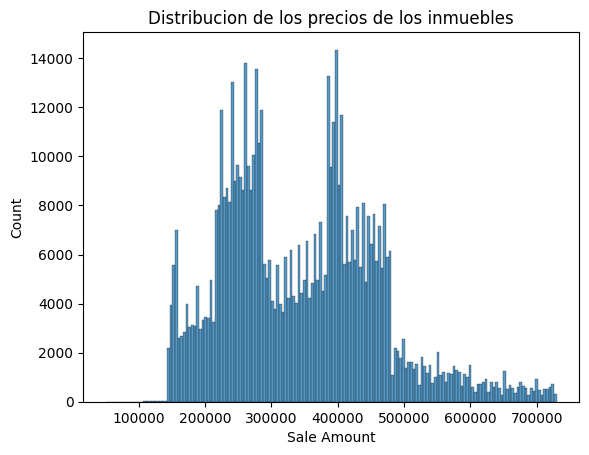

In [18]:
# 1) EDA

#Histograma

sns.histplot(df['Sale Amount'])
plt.title("Distribucion de los precios de los inmuebles")
plt.show()

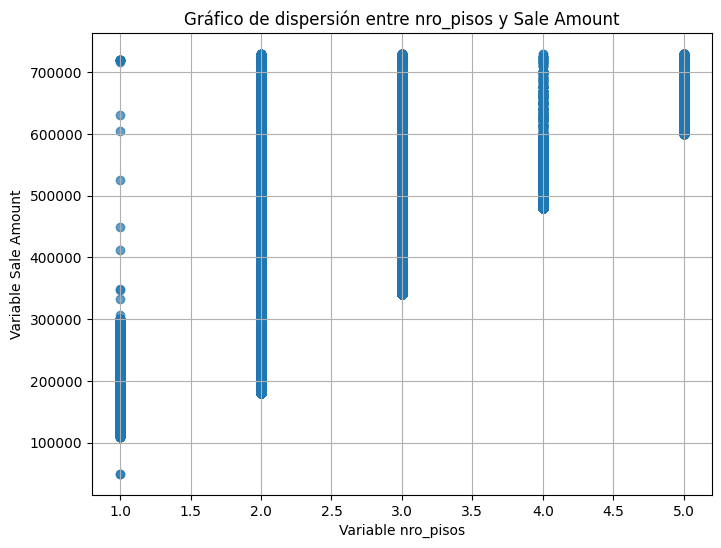

In [19]:
# Grafico de Dispersión

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['nro_pisos'], df['Sale Amount'], alpha=0.7)
plt.title('Gráfico de dispersión entre nro_pisos y Sale Amount')
plt.xlabel('Variable nro_pisos')
plt.ylabel('Variable Sale Amount')
plt.grid(True)
plt.show()

Insight 1: Retirando a los outliers el precio medio se ubica cercano a S/ 252,296 soles


In [20]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Property Type', 'Residential Type', 'area_m2',
       'meses_en_venta', 'Sale Amount', 'nro_habitaciones', 'nro_pisos'],
      dtype='object')

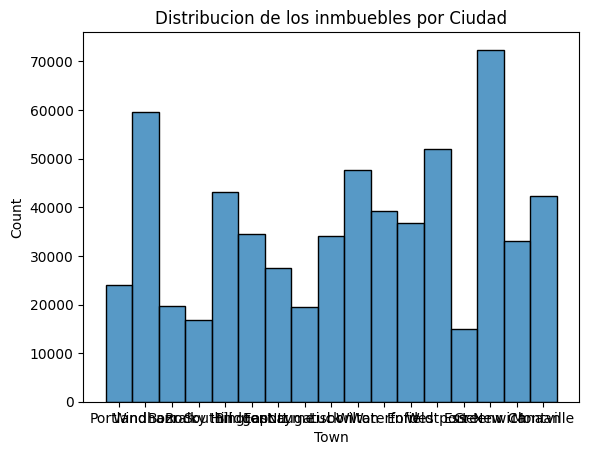

In [21]:
# 2) EDA

#Histograma

sns.histplot(df['Town'])
plt.title("Distribucion de los inmbuebles por Ciudad")
plt.show()

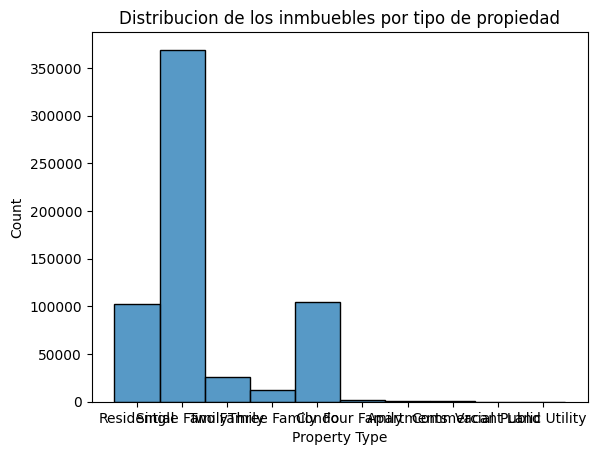

In [22]:
# 3) EDA

# Histograma

sns.histplot(df['Property Type'])
plt.title("Distribucion de los inmbuebles por tipo de propiedad")
plt.show()

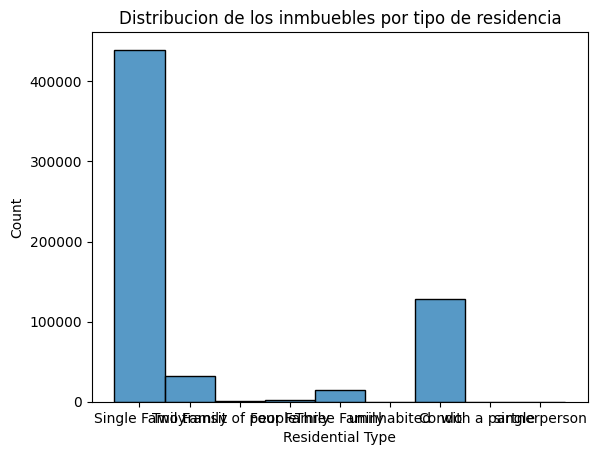

In [64]:
# 4) EDA

# Histograma

sns.histplot(df['Residential Type'])
plt.title("Distribucion de los inmbuebles por tipo de residencia")
plt.show()

In [23]:
# 2) Data Wrangling

df.isna().sum()

,0
Serial Number,0
List Year,0
Date Recorded,0
Town,0
Address,0
Assessed Value,0
Property Type,0
Residential Type,0
area_m2,0
meses_en_venta,0


In [25]:
df.head(3)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Property Type,Residential Type,area_m2,meses_en_venta,Sale Amount,nro_habitaciones,nro_pisos
0,21,2021,10/05/2021,Portland,323 JONES HOLLOW RD,279000.0,Residential,Single Family,155m2,9,279000.0,5,2
1,82,2008,10/01/2008,Windham,17 SUNRISE HILL,443200.0,Single Family,Single Family,277m2,1,443200.0,7,3
2,83,2008,10/01/2008,Windham,33 HIDDEN PINES CIRCLE,454400.0,Single Family,Single Family,284m2,4,454400.0,7,3


In [ ]:
# columna area_m2:
# Eliminamos los caracteres m2 de la variable area_m2

df['area_m2'] = df['area_m2'].str.replace("m2","").astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617183 entries, 0 to 666323
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     617183 non-null  int64  
 1   List Year         617183 non-null  int64  
 2   Date Recorded     617183 non-null  object 
 3   Town              617183 non-null  object 
 4   Address           617183 non-null  object 
 5   Assessed Value    617183 non-null  float64
 6   Property Type     617183 non-null  object 
 7   Residential Type  617183 non-null  object 
 8   area_m2           617183 non-null  float64
 9   meses_en_venta    617183 non-null  int64  
 10  Sale Amount       617183 non-null  float64
 11  nro_habitaciones  617183 non-null  int64  
 12  nro_pisos         617183 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 65.9+ MB


In [28]:
df.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Property Type,Residential Type,area_m2,meses_en_venta,Sale Amount,nro_habitaciones,nro_pisos
0,21,2021,10/05/2021,Portland,323 JONES HOLLOW RD,279000.0,Residential,Single Family,155.0,9,279000.0,5,2
1,82,2008,10/01/2008,Windham,17 SUNRISE HILL,443200.0,Single Family,Single Family,277.0,1,443200.0,7,3
2,83,2008,10/01/2008,Windham,33 HIDDEN PINES CIRCLE,454400.0,Single Family,Single Family,284.0,4,454400.0,7,3
3,84,2008,10/01/2008,Windham,24 PILGRIM LANE,262800.0,Single Family,Single Family,146.0,7,262800.0,4,2
4,85,2008,10/01/2008,Windham,46 ORCHID RD,341700.0,Single Family,Single Family,201.0,8,341700.0,6,3


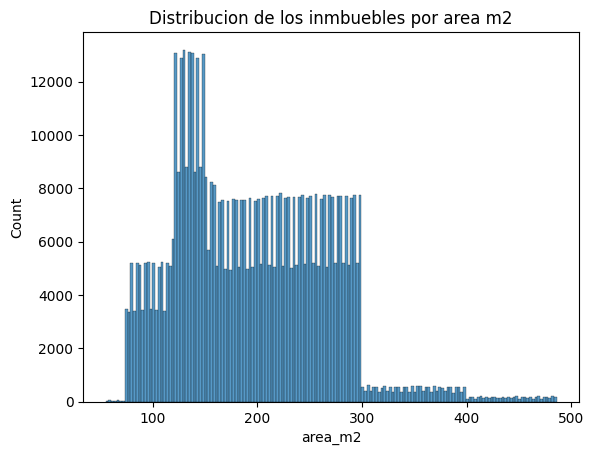

In [31]:
# Histograma

sns.histplot(df['area_m2'])
plt.title("Distribucion de los inmbuebles por area m2")
plt.show()

In [32]:
# Memory

df['Address'].unique()

array(['323 JONES HOLLOW RD', '17 SUNRISE HILL', '33 HIDDEN PINES CIRCLE',
       ..., '34 ARROWHEAD WAY #A3', '8 SUMMIT CT',
       '79 WASHINGTON RD UNIT 7'], dtype=object)

Datos muy dispersos en la variable Address

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617183 entries, 0 to 666323
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     617183 non-null  int64  
 1   List Year         617183 non-null  int64  
 2   Date Recorded     617183 non-null  object 
 3   Town              617183 non-null  object 
 4   Address           617183 non-null  object 
 5   Assessed Value    617183 non-null  float64
 6   Property Type     617183 non-null  object 
 7   Residential Type  617183 non-null  object 
 8   area_m2           617183 non-null  object 
 9   meses_en_venta    617183 non-null  int64  
 10  Sale Amount       617183 non-null  float64
 11  nro_habitaciones  617183 non-null  int64  
 12  nro_pisos         617183 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 65.9+ MB


In [33]:
# Mostrar la cantidad de valores nulos por cada columna
print(df.isnull().sum())


Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Property Type       0
Residential Type    0
area_m2             0
meses_en_venta      0
Sale Amount         0
nro_habitaciones    0
nro_pisos           0
dtype: int64


In [34]:
df['Property Type'].value_counts()

,count
Property Type,
Single Family,369055
Condo,104554
Residential,102778
Two Family,25823
Three Family,11853
Four Family,1393
Apartments,934
Commercial,631
Vacant Land,154


In [35]:
# Columna "Property Type" (OHE)

df = pd.get_dummies(df, columns=['Property Type'], dtype='int')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617183 entries, 49141 to 666323
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Serial Number                 617183 non-null  int64  
 1   List Year                     617183 non-null  int64  
 2   Date Recorded                 617183 non-null  object 
 3   Town                          617183 non-null  object 
 4   Address                       617183 non-null  object 
 5   Assessed Value                617183 non-null  float64
 6   Residential Type              617183 non-null  object 
 7   area_m2                       617183 non-null  float64
 8   meses_en_venta                617183 non-null  int64  
 9   Sale Amount                   617183 non-null  float64
 10  nro_habitaciones              617183 non-null  int64  
 11  nro_pisos                     617183 non-null  int64  
 12  Property Type_Apartments      617183 non-null

In [37]:
df.head(3)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Residential Type,area_m2,meses_en_venta,Sale Amount,...,Property Type_Apartments,Property Type_Commercial,Property Type_Condo,Property Type_Four Family,Property Type_Public Utility,Property Type_Residential,Property Type_Single Family,Property Type_Three Family,Property Type_Two Family,Property Type_Vacant Land
0,21,2021,10/05/2021,Portland,323 JONES HOLLOW RD,279000.0,Single Family,155.0,9,279000.0,...,0,0,0,0,0,1,0,0,0,0
1,82,2008,10/01/2008,Windham,17 SUNRISE HILL,443200.0,Single Family,277.0,1,443200.0,...,0,0,0,0,0,0,1,0,0,0
2,83,2008,10/01/2008,Windham,33 HIDDEN PINES CIRCLE,454400.0,Single Family,284.0,4,454400.0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
len(df['Residential Type'].unique())

9

In [39]:
# Usar OHE en OpSys
df = pd.get_dummies(df, columns=['Residential Type'], dtype='int')

In [ ]:
df.info()

In [78]:
len(df['Town'].unique())

17

In [41]:
# TAREA 2.1: Usar OHE en OpSys
df = pd.get_dummies(df, columns=['Town'], dtype='int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617183 entries, 0 to 666323
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Serial Number                       617183 non-null  int64  
 1   List Year                           617183 non-null  int64  
 2   Date Recorded                       617183 non-null  object 
 3   Address                             617183 non-null  object 
 4   Assessed Value                      617183 non-null  float64
 5   area_m2                             617183 non-null  float64
 6   meses_en_venta                      617183 non-null  int64  
 7   Sale Amount                         617183 non-null  float64
 8   nro_habitaciones                    617183 non-null  int64  
 9   nro_pisos                           617183 non-null  int64  
 10  Property Type_Apartments            617183 non-null  int64  
 11  Property Type_Commercial       

In [43]:
df.head(3)

,Serial Number,List Year,Date Recorded,Address,Assessed Value,area_m2,meses_en_venta,Sale Amount,nro_habitaciones,nro_pisos,...,Town_Montville,Town_Naugatuck,Town_New Canaan,Town_Portland,Town_Rocky Hill,Town_Southington,Town_Waterford,Town_Westport,Town_Wilton,Town_Windham
0,21,2021,10/05/2021,323 JONES HOLLOW RD,279000.0,155.0,9,279000.0,5,2,...,0,0,0,1,0,0,0,0,0,0
1,82,2008,10/01/2008,17 SUNRISE HILL,443200.0,277.0,1,443200.0,7,3,...,0,0,0,0,0,0,0,0,0,1
2,83,2008,10/01/2008,33 HIDDEN PINES CIRCLE,454400.0,284.0,4,454400.0,7,3,...,0,0,0,0,0,0,0,0,0,1


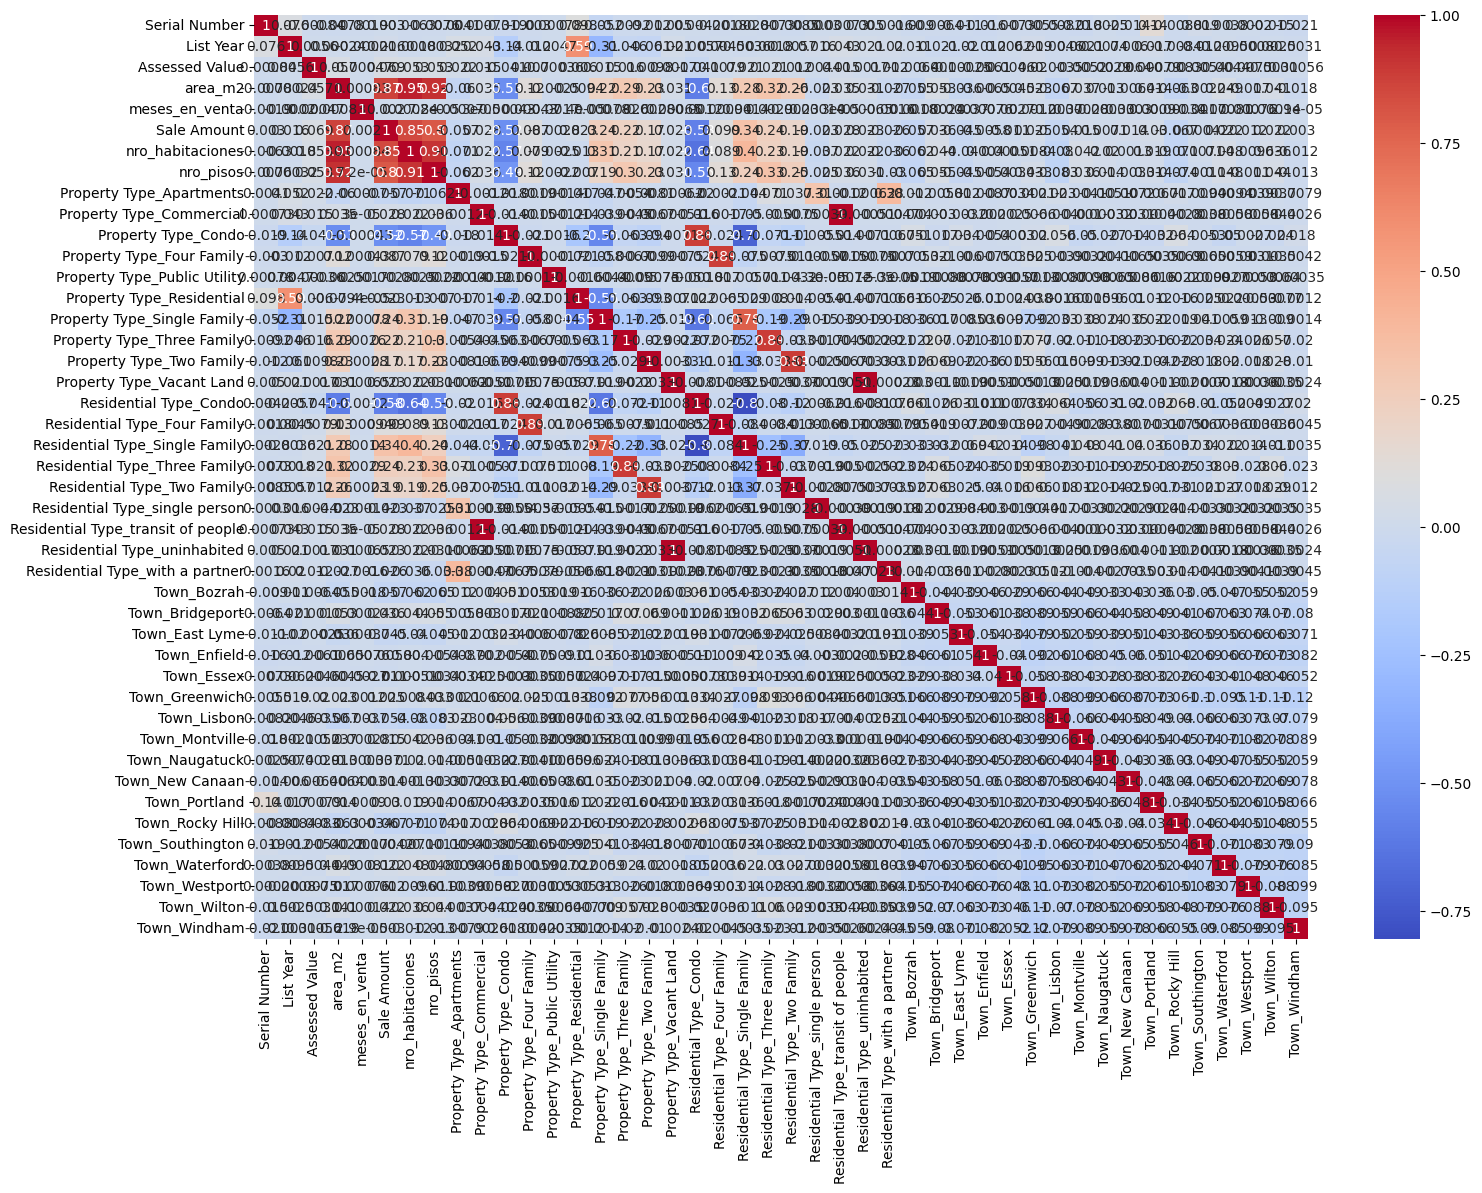

In [44]:
# Matriz de Correlacion (Mapa de calor)

plt.figure(figsize=(17,12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

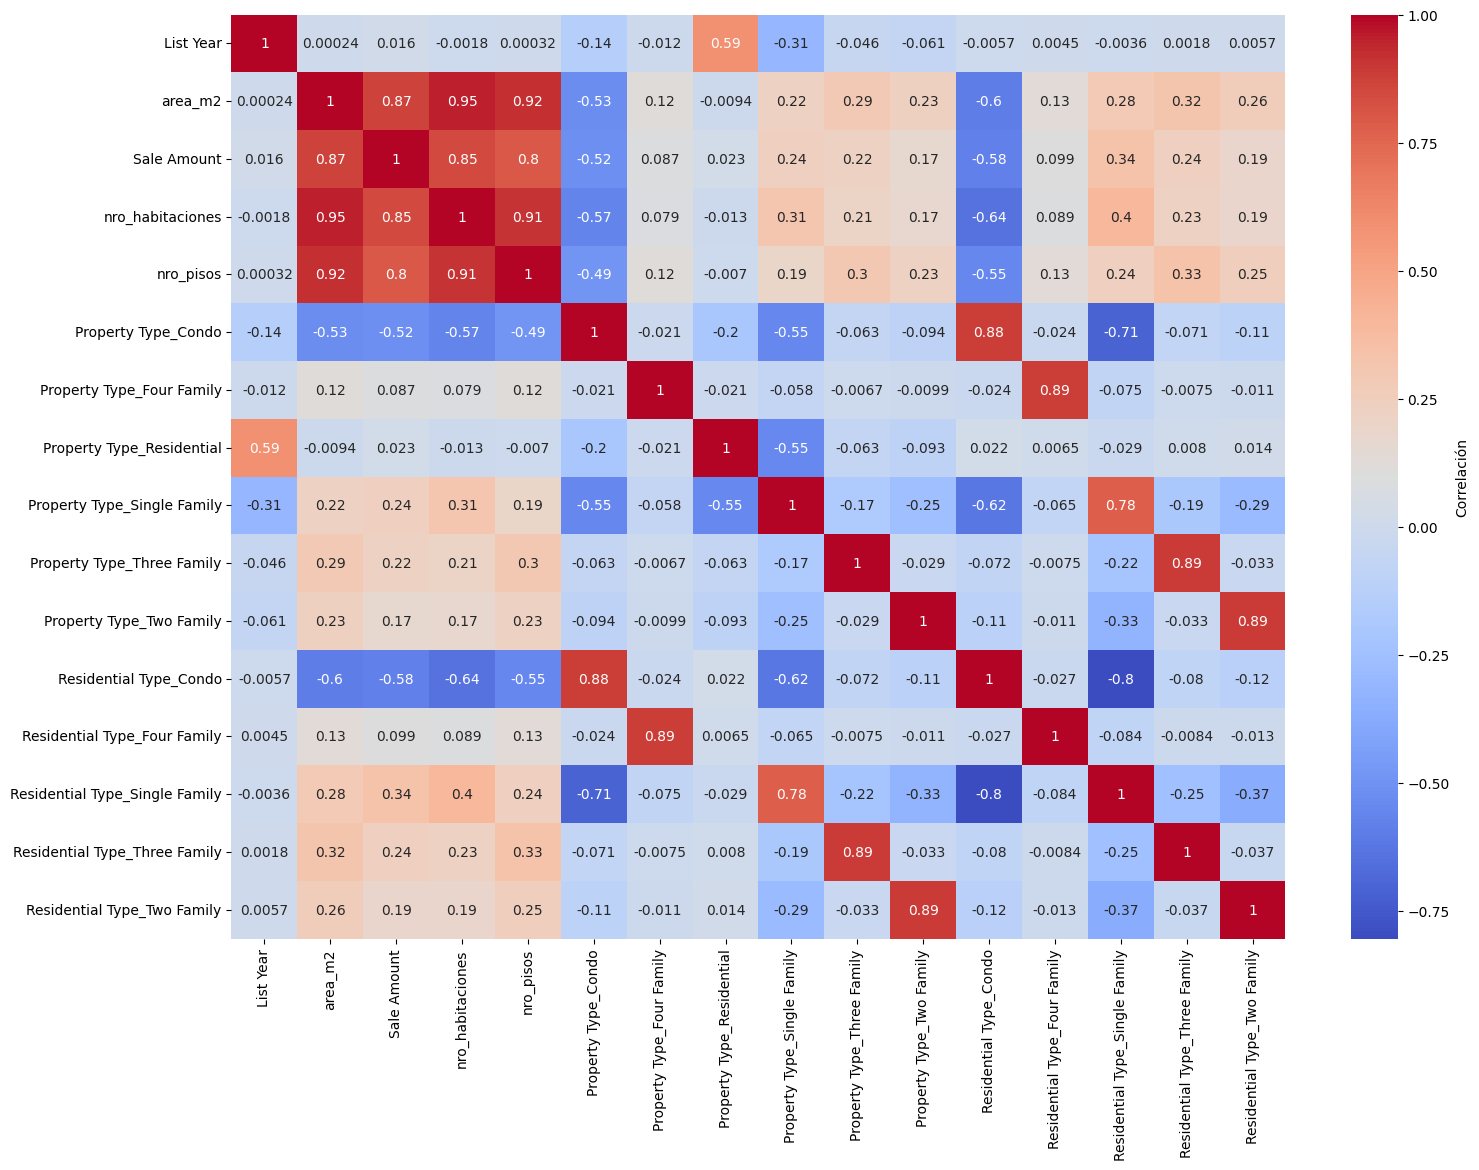

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Filtramos las columnas y filas donde la correlación no cumple la condición
mask = (corr_matrix > 0.5) & (corr_matrix < 1.0)

# Aplicamos la máscara para eliminar las filas y columnas que no cumplen la condición
corr_matrix_filtered = corr_matrix[mask.any(axis=1)].loc[:, mask.any(axis=0)]

# Creamos el mapa de calor solo con las variables que cumplen la condición
plt.figure(figsize=(17,12))
sns.heatmap(corr_matrix_filtered, cmap='coolwarm', annot=True, cbar_kws={'label': 'Correlación'})
plt.show()






In [47]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Address',
       'Assessed Value', 'area_m2', 'meses_en_venta', 'Sale Amount',
       'nro_habitaciones', 'nro_pisos', 'Property Type_Apartments',
       'Property Type_Commercial', 'Property Type_Condo',
       'Property Type_Four Family', 'Property Type_Public Utility',
       'Property Type_Residential', 'Property Type_Single Family',
       'Property Type_Three Family', 'Property Type_Two Family',
       'Property Type_Vacant Land', 'Residential Type_Condo',
       'Residential Type_Four Family', 'Residential Type_Single Family',
       'Residential Type_Three Family', 'Residential Type_Two Family',
       'Residential Type_single person', 'Residential Type_transit of people',
       'Residential Type_uninhabited', 'Residential Type_with a partner',
       'Town_Bozrah', 'Town_Bridgeport', 'Town_East Lyme', 'Town_Enfield',
       'Town_Essex', 'Town_Greenwich', 'Town_Lisbon', 'Town_Montville',
       'Town_Naugatuck', 'Town_New

In [49]:
# Feature Selection

X = df[['nro_habitaciones', 'Property Type_Condo', 'nro_pisos', 'area_m2', 'Residential Type_Condo', 'Residential Type_Single Family']]
y = df['Sale Amount']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [51]:
import sklearn

print(sklearn.__version__)

1.6.1


In [52]:
# Algoritmo 1: Regresion Lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [53]:
# crear predicciones

y_pred_lr = lr.predict(X_test)

# Evaluacion

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

MAE: 31003.093903968384
R2: 0.7686934518019444


In [57]:
df['Sale Amount'].mean()

np.float64(345877.89184245194)

In [58]:
(31003/345877) * 100

8.963591103195645

### Evaluacion de Overfitting

In [32]:
# crear predicciones

y_pred_lr = lr.predict(X_train)

# Evaluacion

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_train, y_pred_lr))
print("R2:", r2_score(y_train, y_pred_lr))

MAE: 30917.487900614313
R2: 0.7709968013054367


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [122]:
print("Mejores parámetros encontrados:", grid.best_params_)
print("MAE promedio (CV 5-folds):", -grid.best_score_)

Mejores parámetros encontrados: {'fit_intercept': False, 'positive': True}
MAE promedio (CV 5-folds): 36957.16932311629


MAE: 30917.487900614313
R2: 0.7709968013054367


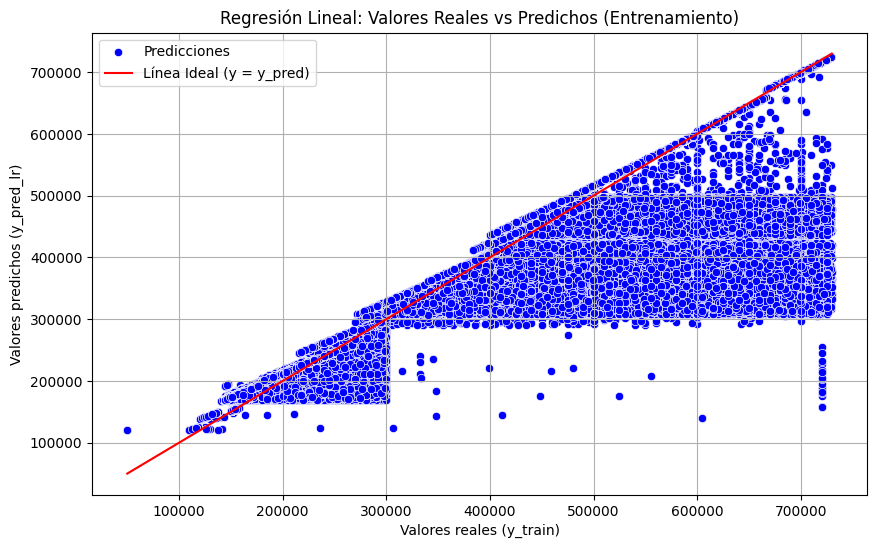

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear predicciones
y_pred_lr = lr.predict(X_train)

# Evaluación (ya incluida en tu código)
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_train, y_pred_lr))
print("R2:", r2_score(y_train, y_pred_lr))

# Gráfico de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_lr, color='blue', label='Predicciones')
sns.lineplot(x=y_train, y=y_train, color='red', label='Línea Ideal (y = y_pred)')
plt.xlabel("Valores reales (y_train)")
plt.ylabel("Valores predichos (y_pred_lr)")
plt.title("Regresión Lineal: Valores Reales vs Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Crear y entrenar el modelo
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predecir
y_pred_dt = dt.predict(X_test)

# Evaluar
print("Árbol de Decisión:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))


Árbol de Decisión:
MAE: 28884.62454172389
R2: 0.7834199407572628


In [37]:
(28884/345877) * 100

8.350945567354868

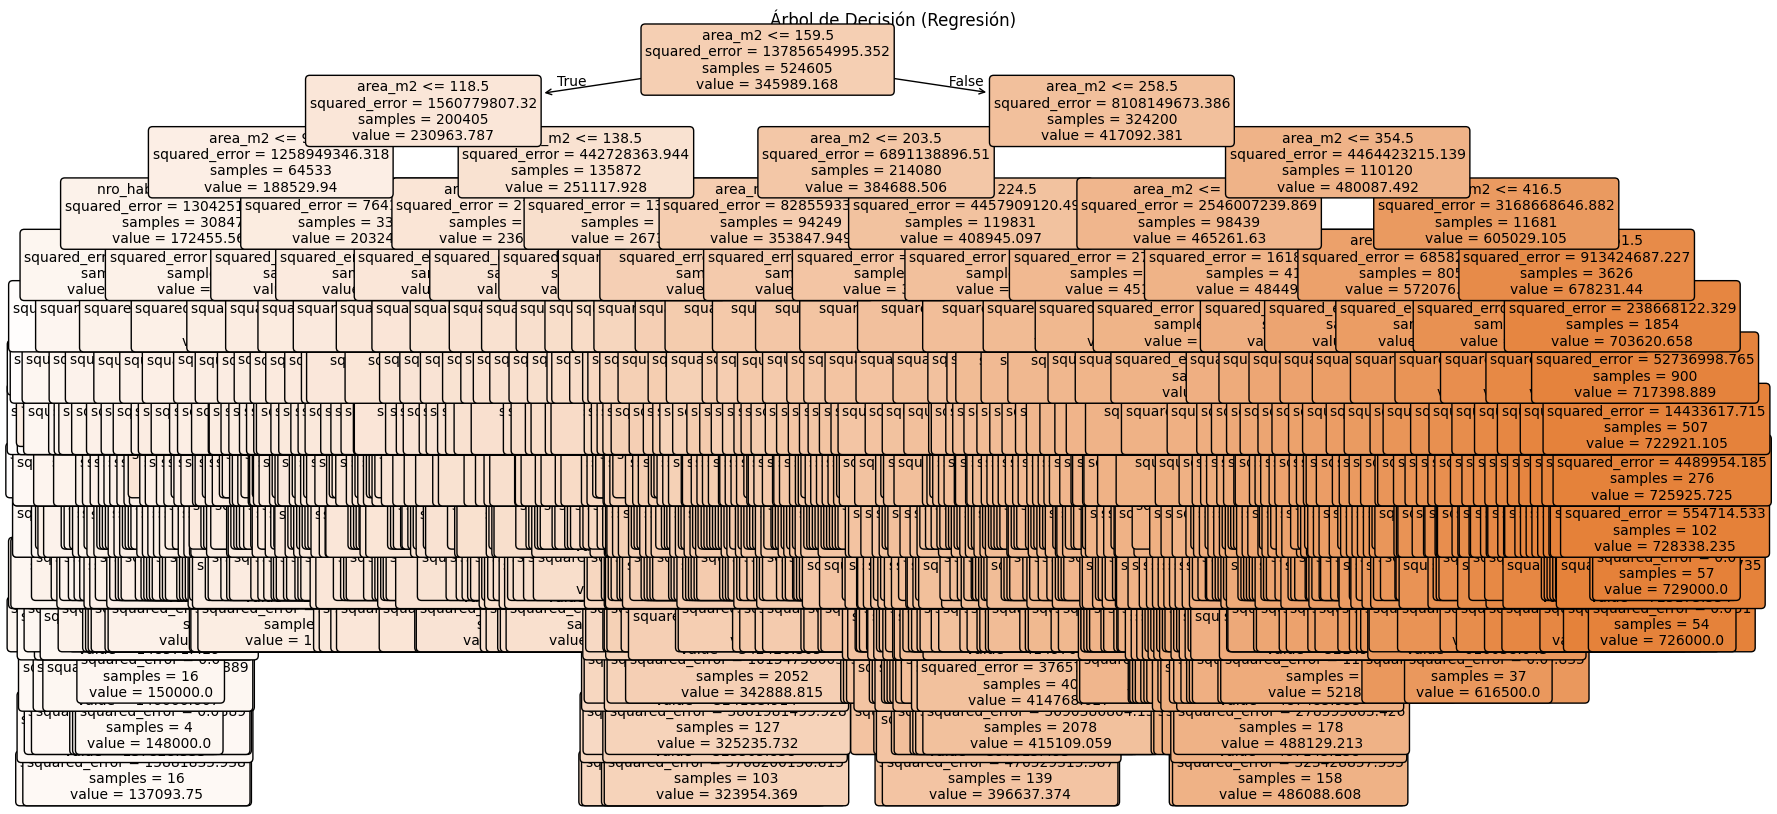

In [124]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión (Regresión)")
plt.show()



Random Forest:
MAE: 28881.44011280121
R2: 0.7834178913501869


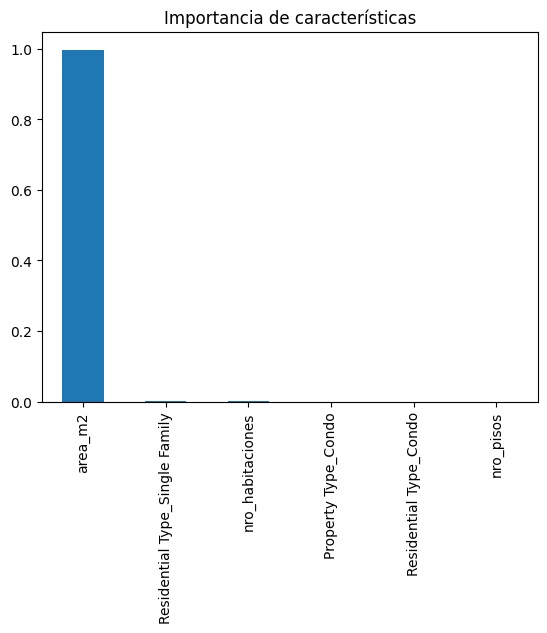

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_test)

# Evaluar
print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

# Importancia de características
import pandas as pd
import matplotlib.pyplot as plt

importancias = pd.Series(rf.feature_importances_, index=X_train.columns)
importancias.sort_values(ascending=False).plot(kind='bar', title='Importancia de características')
plt.show()


In [40]:
(28881/345877) * 100

8.35007820699266

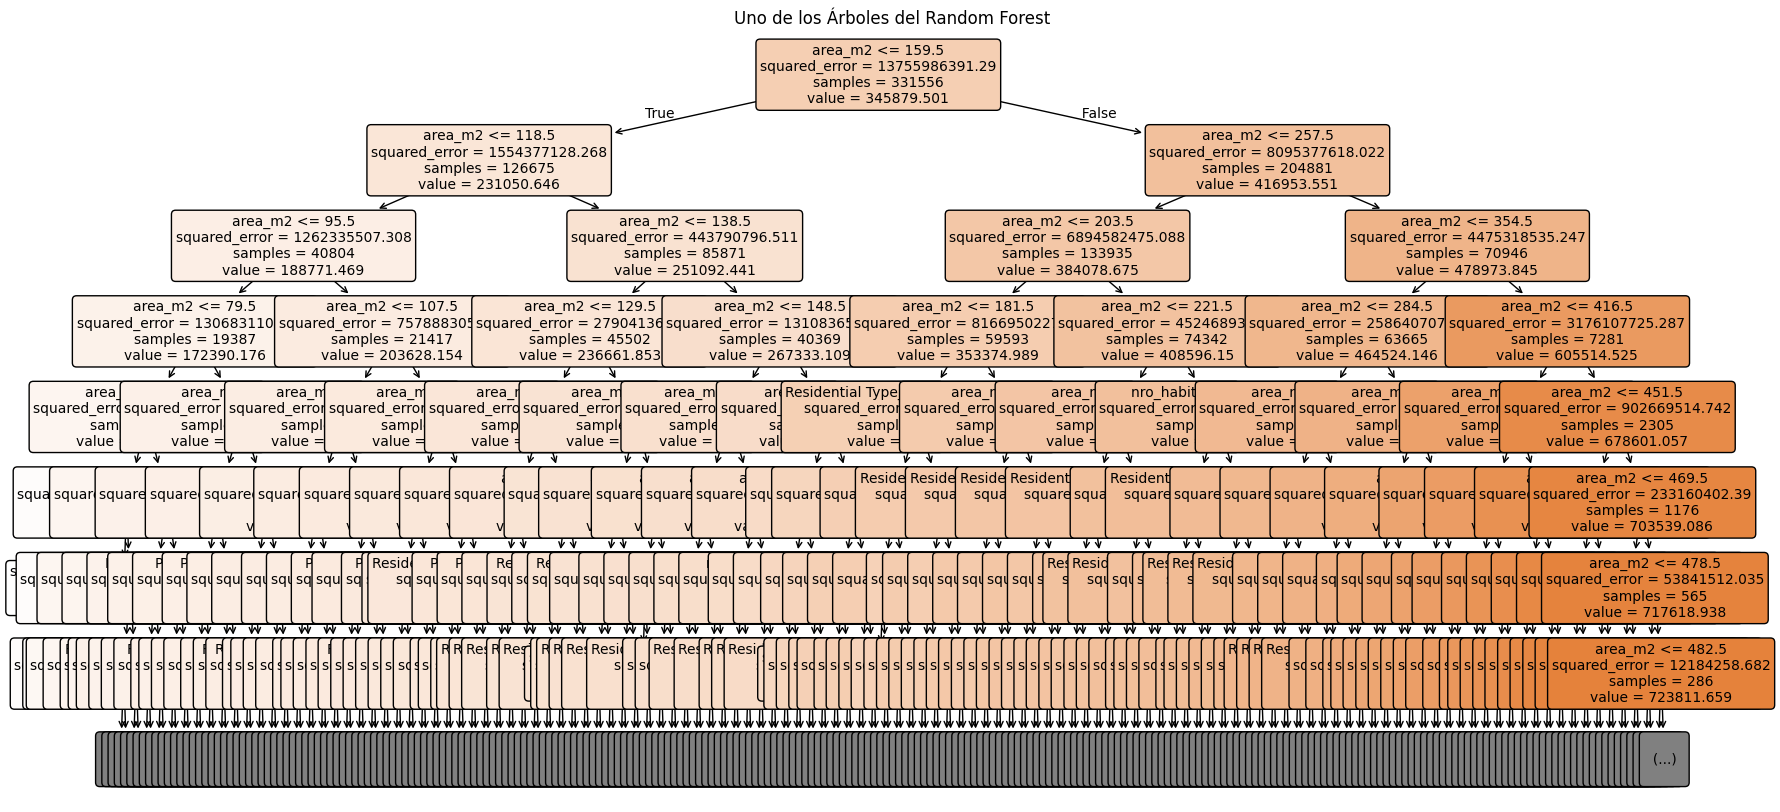

In [126]:
# Elegir un árbol del bosque, por ejemplo el primero
estimator = rf.estimators_[0]

# Graficar ese árbol individual
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          max_depth=7,  # Limitar profundidad para claridad
          fontsize=10)
plt.title("Uno de los Árboles del Random Forest")
plt.show()

# Conclusión
##Resultados:
#Modelo de Random Forest: Se recomienda utilizar por los siguiente:

##MAE: 28881
##R2: 0.783
##ERROR RELATIVO: 8.35%


##1. Menor MAE y error relativo (aunque por poco margen): demuestra que tiene mejor precisión promedio que los otros dos.

##2. R² más alto (empatado con Árbol de Decisión): indica que explica mejor la variabilidad del target sale amount.

##3. Robustez y generalización: Random Forest, al ser un modelo de ensamblado, reduce el riesgo de overfitting comparado con un único Árbol de Decisión y es escalable para mayor cantidad de datos

##4. Consistencia: los resultados de MAE y R² muestran equilibrio entre precisión y capacidad de generalización.

